In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
%matplotlib inline

sns.set_style("whitegrid")

In [2]:
# Reading the datasets
df = pd.read_csv('/Users/14155/C964/train.csv')
test = pd.read_csv('/Users/14155/C964/test.csv')
# y from train dataset output
y = df['SalePrice']


## Enter values to predict House price

In [3]:
# Calculate a house price prediction given a set of user input values and plugs them for forest regression analysis
def predict_house_price(garage_area, gr_liv_area, total_basement_sf, first_floor_sf, garage_cars, quality):
    house_price = forr_regress.predict([[
        garage_area.value,
        gr_liv_area.value,
        total_basement_sf.value,
        first_floor_sf.value,
        garage_cars.value,
        quality.value]])
        
    return house_price


        

In [4]:
garage_area = widgets.BoundedIntText(min=0, max=1000, description='Garage Area:', disabled=False)
display(garage_area)

gr_liv_area = widgets.BoundedIntText(min=0, max=4000, description='Total Liv Area:', disabled=False)
display(gr_liv_area)

total_basement_sf = widgets.BoundedIntText(min=0, max=4000, description='Basement Area:', disabled=False)
display(total_basement_sf)

first_floor_sf = widgets.BoundedIntText(min=0, max=4000, description='First Floor Area:', disabled=False)
display(first_floor_sf)

garage_cars = widgets.BoundedIntText(min=0, max=4, description='Cars in Garage:', disabled=False)
display(garage_cars)

quality = widgets.BoundedIntText(min=0, max=10, description='Quality:', disabled=False)
display(quality)





BoundedIntText(value=0, description='Garage Area:', max=1000)

BoundedIntText(value=0, description='Total Liv Area:', max=4000)

BoundedIntText(value=0, description='Basement Area:', max=4000)

BoundedIntText(value=0, description='First Floor Area:', max=4000)

BoundedIntText(value=0, description='Cars in Garage:', max=4)

BoundedIntText(value=0, description='Quality:', max=10)

In [5]:
def on_button_click(_):
    price_prediction = predict_house_price(garage_area, gr_liv_area, total_basement_sf, first_floor_sf, garage_cars, quality)
    
    with out:
        out.clear_output()
        print("Prediction")
        print("------------------------------------")
        print("The system predicts the house to be", price_prediction, "hundred thousand dollars given the value of the factors.\n")
        print("The mean squared error is:", metrics.mean_squared_error(y_test, y_train))
        print("The mean absolute error is:", metrics.mean_absolute_error(y_test, y_train))
        print("The root mean squared error is:", np.sqrt(metrics.mean_squared_error(y_test, y_train)))
    return
        

predict_button = widgets.Button(description="Predict Price")
out = widgets.Output()
predict_button.on_click(on_button_click)
widgets.VBox([predict_button, out])

# Overview of Dataset

In [6]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [7]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


# Exploratory Data Analysis 

<AxesSubplot:xlabel='SalePrice', ylabel='Count'>

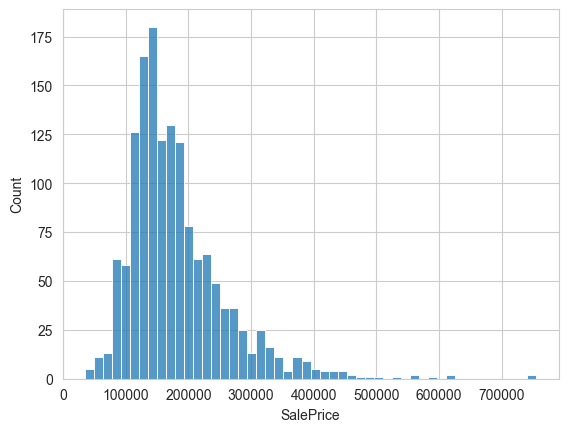

In [8]:
# Histogram to depict distribution of house sale prices
sns.histplot(y, bins = 50)

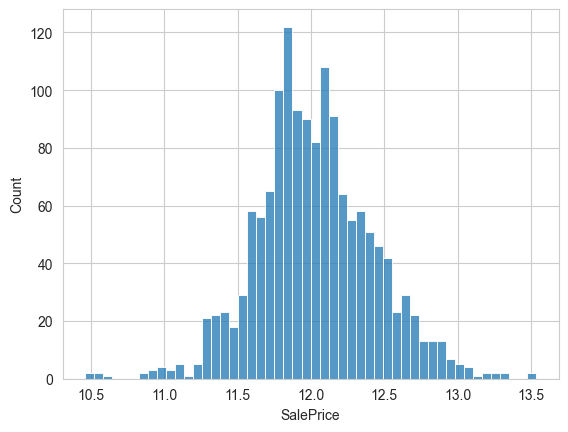

In [9]:
# Eliminate skew by normalizing the dataset
df['SalePrice'] = np.log1p(df['SalePrice'])
sns.histplot(df['SalePrice'], bins = 50);

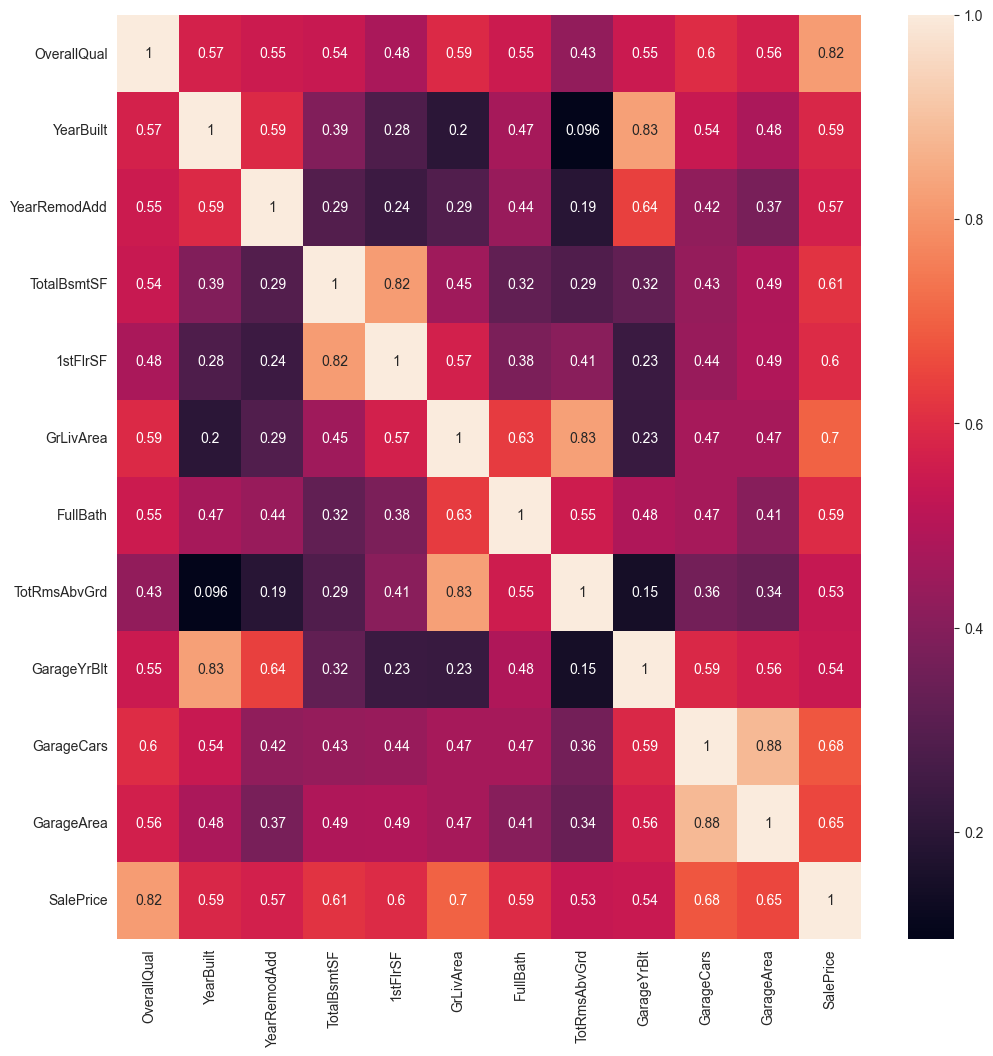

In [10]:
# Depict correlation of data using heatmap for better visualization
# Only shows variables with higher correlation (>0.5)
correlation = df.corr()
corr_high = correlation.index[abs(correlation["SalePrice"])>0.5]
plt.figure(figsize=(12,12))
g = sns.heatmap(df[corr_high].corr(),annot=True)

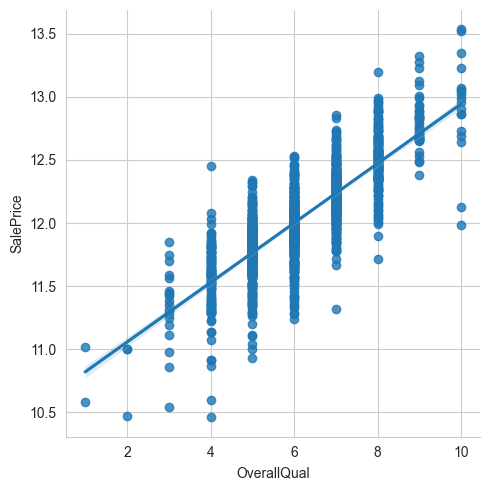

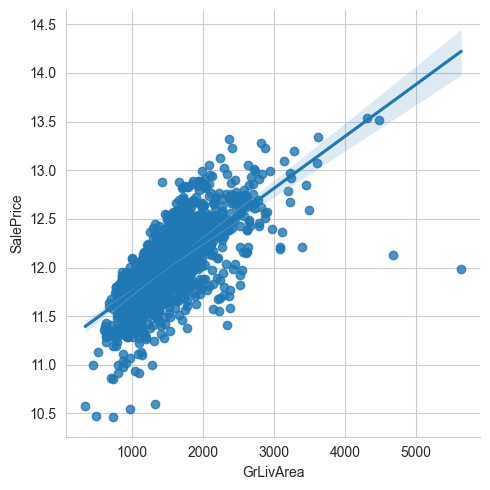

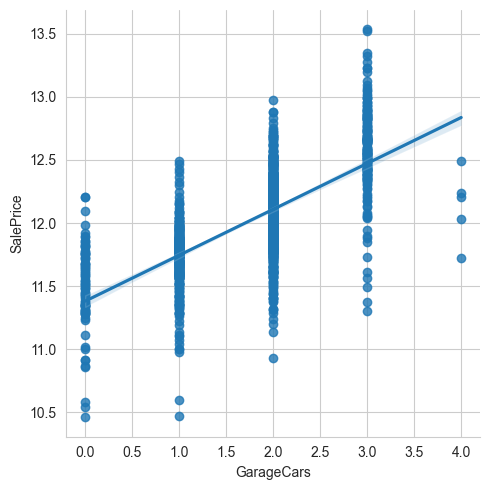

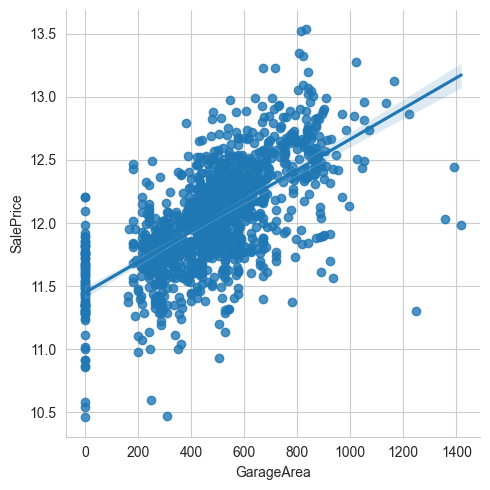

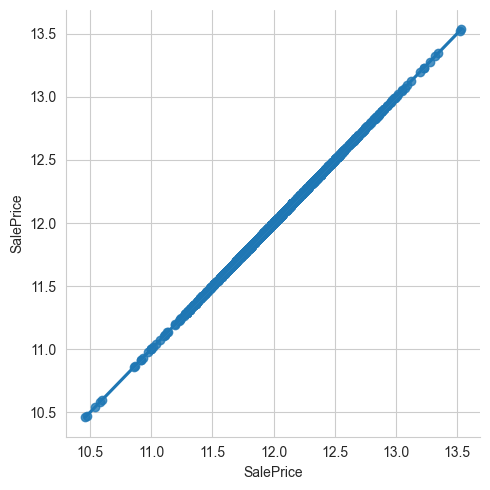

In [11]:
# Select variables with a high correlation (>= 0.65) with sales price
# Depict relation between SalePrice and highly correlated variables
high_corr = correlation.index[correlation['SalePrice'] >= 0.65]
varList = []

for var in high_corr:
    varList.append(var)
    
for var in varList:
    sns.lmplot(x = var, y = 'SalePrice', data = df)

In [12]:
# Remove outliers found above
df = df.drop(df['GarageArea'][df['GarageArea'] > 1000].index)
df = df.drop(df['GrLivArea'][df['GrLivArea'] > 4000].index)
df = df.drop(df['TotalBsmtSF'][df['TotalBsmtSF'] > 4000].index)
df = df.drop(df['1stFlrSF'][df['1stFlrSF'] > 4000 ].index)

y = df['SalePrice']
sig_regressor_df = df[['GarageArea', 'GrLivArea', 'TotalBsmtSF', '1stFlrSF', 'GarageCars', 'OverallQual']]

# Data is split into a training set and a testing set. Train our model on the training set and use test set to evaluate
x_train, x_test, y_train, y_test = train_test_split(sig_regressor_df, y, test_size=0.5, random_state=0)


forr_regress = RandomForestRegressor(n_estimators=150, random_state=25)
# Check and clean datasets from NaN values 
x_train = np.nan_to_num(x_train)
y_train = np.nan_to_num(y_train)
# Train the forest regressor
forr_regress.fit(x_train, y_train)

RandomForestRegressor(n_estimators=150, random_state=25)